<a href="https://colab.research.google.com/github/reshma0209/Machine-learning/blob/main/22pw31_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MATRIX REPRESENTATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###Convert into Matrix form

In [ ]:
X = np.matrix([ [1, 4.0],
                [1, 4.5],
                [1, 5.0],
                [1, 5.5],
                [1, 6.0],
                [1, 6.5],
                [1, 7.0]] )

### Take transpose

In [ ]:
XT = np.matrix.transpose(X)

In [ ]:
y = np.matrix([ [33],
                [42],
                [45],
                [51],
                [53],
                [61],
                [62]])

### Multiplying and taking inverse

In [ ]:
XT_X = np.matmul(XT, X)
XT_Y = np.matmul(XT, y)
XT_X_inv = np.linalg.inv(XT_X)

### Finding beta values(b0, b1)

In [ ]:
betas = np.matmul(XT_X_inv, XT_Y)
betas

matrix([[-2.67857143],
        [ 9.5       ]])

### Trying other x values

In [ ]:
y = betas[0,0] + betas[1,0]*(4.1)
y

36.27142857142864

# EXERSISE 2

Explore different methods to calculate regression:
1. using pandas data frame
2. using numpy matrix method
3. using scipy stats library

## Problem 1 (Using df)
Sam found how many hours of sunshine vs how many ice creams were sold at the shop
from Monday to Friday:



|"x" hours of sunshine | "y" Ice creams sold |
|---|---|
|2|4|
|3|5|
|5|7|
|7|10|
|9|15|

In [ ]:
import pandas as pd

#### i. Calculate y = mx + b using formula. Find a linear regression equation line.

In [ ]:
df = pd.DataFrame(
    {
        'x' : [2,3,5,7,9],
        'y' : [4,5,7,10,15]
    }
)

sum_x = df['x'].sum()
sum_y = df['y'].sum()
sum_xy =(df['x']*df['y']).sum()
sum_x2 = (df['x']**2).sum()
n = len(df)

m = ((n*sum_xy) - (sum_x*sum_y)) / (n*sum_x2 - sum_x**2)
c = (sum_y* sum_x2 - sum_x * sum_xy) /(n*sum_x2 - sum_x**2)

print(f"Slope is {m} and intercept is {c}")

Slope is 1.5182926829268293 and intercept is 0.3048780487804878


####ii. Calculate the correlation coefficient between two variables.

In [ ]:
r = df.corr()['x']['y']
print(f"Correlation coefft = {r}")

Correlation coefft = 0.9795560970827194


#### iii Find a linear regression equation line.

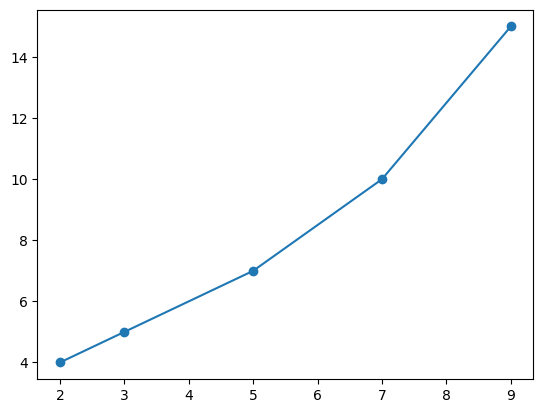

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'] , df['y'])

####iv. Find least squares of errors.

Least squares of errors = 3.1890243902439055


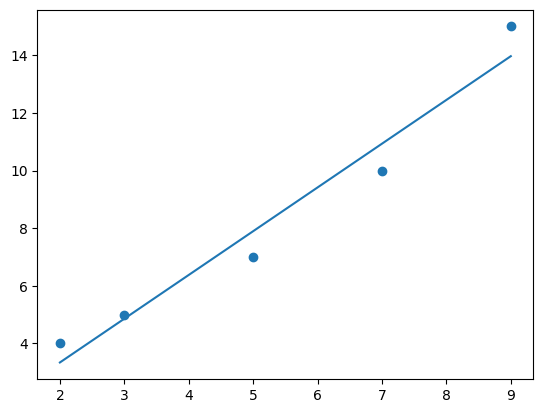

In [ ]:
df['y_cap'] = m*df['x'] + c
lse = ((df['y'] - df['y_cap'])**2).sum()
print(f"Least squares of errors = {lse}")

plt.scatter(df['x'], df['y'])
plt.plot(df['x'] , df['y_cap'])

####v. Introduce outlier and check whether error is sensitive to it

In [ ]:
# Calculate IQR
Q1 = df[['x', 'y']].quantile(0.25)
Q3 = df[['x', 'y']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

x   -3.0
y   -2.5
dtype: float64
x    13.0
y    17.5
dtype: float64


Least squares of error after introducing an outlier = 6.384197056941776


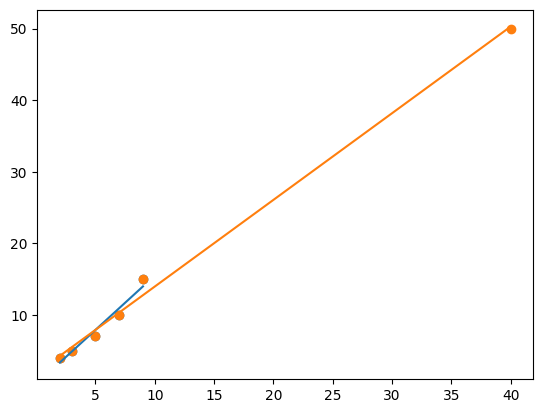

In [ ]:
outlier = pd.DataFrame(
    {
        'x' : [2,3,5,7,9,40],
        'y' : [4,5,7,10,15,50]
    }
)

sum_x = outlier['x'].sum()
sum_y = outlier['y'].sum()
sum_xy =(outlier['x']*outlier['y']).sum()
sum_x2 = (outlier['x']**2).sum()
n = len(outlier)

m = ((n*sum_xy) - (sum_x*sum_y)) / (n*sum_x2 - sum_x**2)
c = (sum_y* sum_x2 - sum_x * sum_xy) /(n*sum_x2 - sum_x**2)

outlier['y_cap'] = (outlier['x']*m + c)
error = ((outlier['y'] - outlier['y_cap'])**2).sum()
print(f"Least squares of error after introducing an outlier = {error}")


plt.scatter(df['x'], df['y'])
plt.plot(df['x'] , df['y_cap'])
plt.scatter(outlier['x'], outlier['y'])
plt.plot(outlier['x'] , outlier['y_cap'])

 LSE is sensitive to the introduced outlier data point

####vi. Draw box plot that is useful to detect outliers and give your inference on it

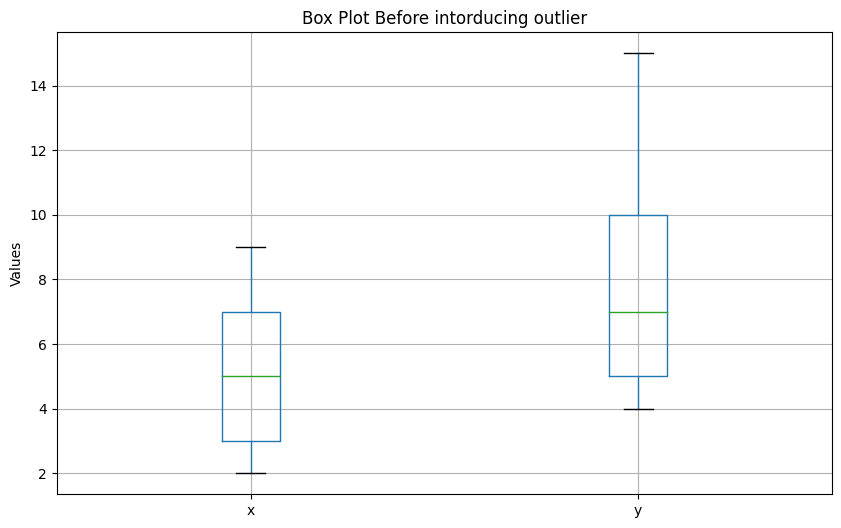

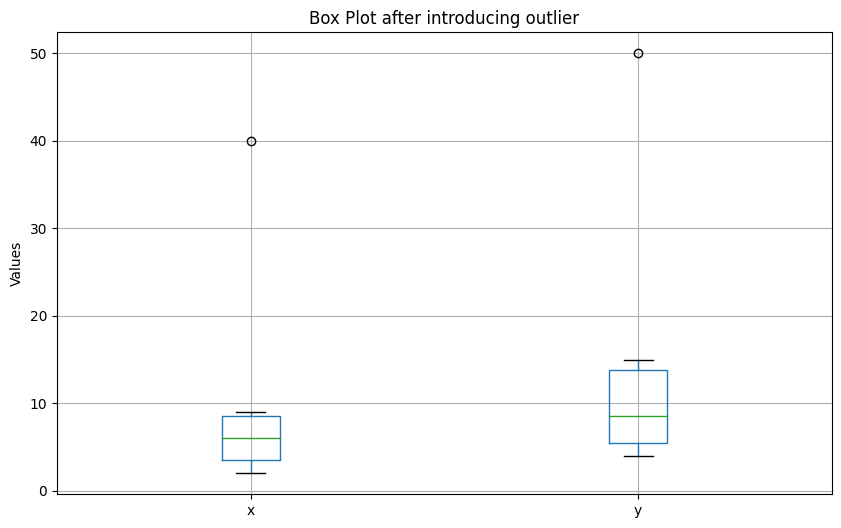

In [ ]:
#Before intorducing outlier
plt.figure(figsize=(10, 6))
df.boxplot(column=['x', 'y'])
plt.title('Box Plot Before intorducing outlier')
plt.ylabel('Values')
plt.show()

print("\n")
#after introducing outlier
plt.figure(figsize=(10, 6))
outlier.boxplot(column=['x', 'y'])
plt.title('Box Plot after introducing outlier')
plt.ylabel('Values')
plt.show()

##Problem 2 (Using Matrix)
The local ice cream shop keeps track of how much ice cream they sell versus the noon
temperature on that day. Here are their figures for the last 12 days:

Ice cream sales vs temperature

|Temperature (°C) | Ice Cream Sales($)|
|---|---|
|14.2|215|
|16.4|325|
|11.9|185|
|15.2|332|
|18.5|406|
|22.1|522|
|19.4|412|
|25.1|614|
|23.4|544|
|18.1|421|
|22.6|445|
|17.2|408|

Give line of best fit using scatter plot. use that equation to interpolate a sales value at 21° and
to extrapolate a sales value at 29°

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Finding slope and intercept

In [ ]:
df = pd.DataFrame(
    {
        'x' : [14.2, 16.4, 11.9, 15.2, 18.5, 22.1, 19.4, 25.1, 23.4, 18.1, 22.6, 17.2],
        'y' : [215, 325, 185, 332, 406, 522, 412, 614, 544, 421, 445, 408]
    }
)

X = np.matrix([[1, x] for x in df['x']])
y = np.matrix(df['y']).T

XT = np.transpose(X)
XT_X = np.matmul(XT, X)
XT_y = np.matmul(XT, y)

b = np.matmul(np.linalg.inv(XT_X), XT_y)
print(f'{betas=}')

m = b[1, 0]
c = b[0, 0]

betas=matrix([[-2.67857143],
        [ 9.5       ]])


#### i. Plot the Line of Best Fit


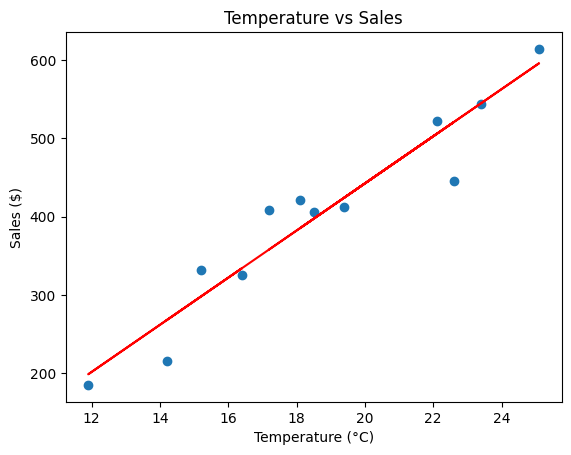

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['x']*m + c, color='red')
plt.xlabel('Temperature (°C)')
plt.ylabel('Sales ($)')
plt.title('Temperature vs Sales')
plt.show()


####ii. Use that equation to interpolate a sales value at 21° and to extrapolate a sales value at 29°

In [ ]:
sales_21 = 21 * m + c
sales_29 = 29 * m + c
print(f"Sales value at 21° C = ${sales_21:.2f}")
print(f"Sales value at 29° C = ${sales_29:.2f}")

Sales value at 21° C = $472.37
Sales value at 29° C = $713.07


##3. Problem 3 (using libraries)

Suppose that we are statistical consultants hired by a client to provide advice on how to
improve sales of a particular product. The Advertising data set consists of the sales of that
product in 200 different markets, along with advertising budgets for the product in each of
those markets for three different media: TV, radio, and newspaper.

*Dataset: https://www.kaggle.com/datasets/ashydv/advertising-dataset*

What is the relationship between sales and TV budget?
Check whether Increasing sales through advertising is having impact or not. Construct
a confidence interval around the slope of a regression line.

#### Load data set


In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
# Load the dataset

file_path = '/content/drive/MyDrive/advertising.csv'
df = pd.read_csv(file_path)

#### i. Relationship between sales and TV budget

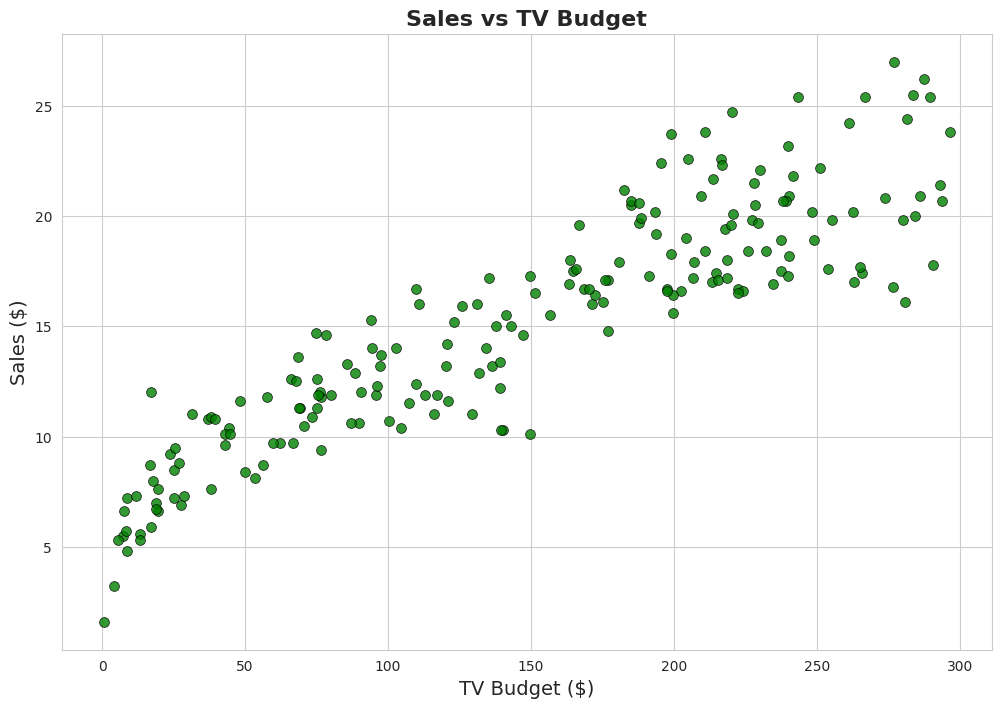

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['TV'], y=df['Sales'], s=50, color='green', edgecolor='k', alpha=0.8)
plt.title('Sales vs TV Budget', fontsize=16, fontweight='bold')
plt.xlabel('TV Budget ($)', fontsize=14)
plt.ylabel('Sales ($)', fontsize=14)
plt.show()

#### Regression line

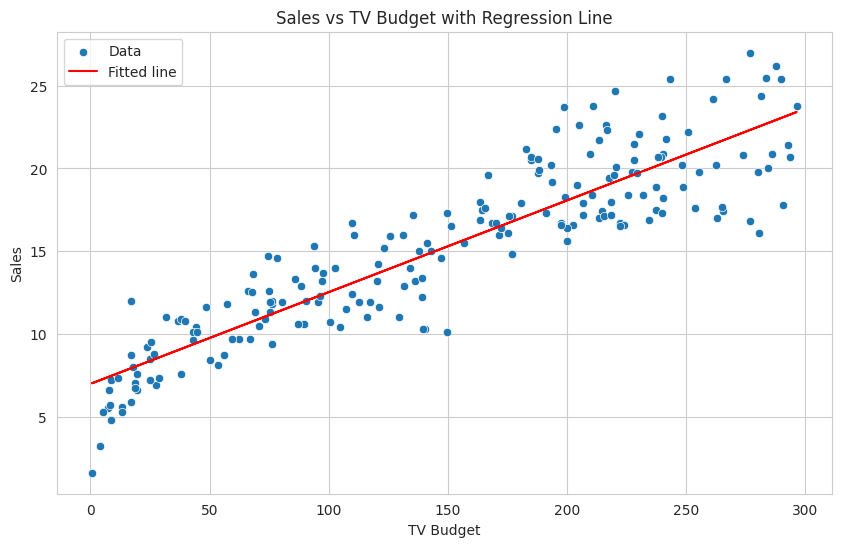

In [ ]:
X = df['TV']
y = df['Sales']

slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TV'], y=df['Sales'], label='Data')
plt.plot(df['TV'], intercept + slope * df['TV'], color='red', label='Fitted line')
plt.title('Sales vs TV Budget with Regression Line')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### ii. Check whether Increasing sales through advertising is having impact or not.

In [ ]:
#find p value

print("Null hypothesis (H0): There is no relationship between TV advertising budget and sales (slope = 0)\nAlternative hypothesis (H1): There is a relationship between TV advertising budget and sales (slope ≠ 0)\n")

alpha = 0.05

if p_value < alpha:
    print(f"Since p-value ({p_value}) < {alpha}, we reject the null hypothesis.")
    print("There is a statistically significant relationship between TV advertising budget and sales.")
    print("Increasing TV advertising budget is likely to have a significant impact on sales.")
else:
    print(f"Since p-value ({p_value}) >= {alpha}, we fail to reject the null hypothesis.")
    print("There is insufficient evidence to conclude a significant relationship between TV advertising budget and sales.")
    print("Increasing TV advertising budget may not have a discernible impact on sales.")

Null hypothesis (H0): There is no relationship between TV advertising budget and sales (slope = 0)
Alternative hypothesis (H1): There is a relationship between TV advertising budget and sales (slope ≠ 0)

Since p-value (7.927911625322733e-74) < 0.05, we reject the null hypothesis.
There is a statistically significant relationship between TV advertising budget and sales.
Increasing TV advertising budget is likely to have a significant impact on sales.


#### iii.  Construct a confidence interval around the slope of a regression line.

In [ ]:
# 95% CI
confidence_interval = stats.t.interval(
    0.95, len(df['TV'])-1, loc=slope, scale=std_err
)
print(f"95% confidence interval for the slope: {confidence_interval}")

# 99% CI
confidence_interval = stats.t.interval(
    0.99, len(df['TV'])-1, loc=slope, scale=std_err
)
print(f"95% confidence interval for the slope: {confidence_interval}")

95% confidence interval for the slope: (0.051726825919062684, 0.0592027150200549)
95% confidence interval for the slope: (0.05053489637826042, 0.060394644560857164)
